# Spring Simulations

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

In [5]:
#Euler's Method for Spring
def spring_sim(kt, mt, R, theta, n, x0, dt = 0.01, T = 10):
    x = x0
    x = np.reshape(x, (1, n+2))
    
    f = np.linspace(0, 0, n+2)
    for i in range(n+1):
        f[i] = mt/(n*(x[-1, i+1]-x[-1, i]))
    f[-1] = f[-2]
    f = np.reshape(f, (1, n+2))
    
    v = np.linspace(0, 0, n+2)
    v = np.reshape(v, (1, n+2))
    
    a = np.linspace(0, 0, n+2)
    a = np.reshape(a, (1, n+2))

    for i in range(n):
        a[-1, i+1] = n**2 * kt / mt * (x[-1, i+2] + x[-1, i] - 2*x[-1, i+1])
    
    t = [0]
    while t[-1] < T:
        v_add = v[-1] + a[-1]*dt
        v = np.vstack([v, v_add])
    
        x_add = x[-1] + v[-1]*dt
        x = np.vstack([x, x_add])
        
        f_add = np.linspace(0, 0, n+2)
        for i in range(n+1):
            f_add[i] = mt/(n*(x[-1, i+1]-x[-1, i]))
        f_add[-1] = f_add[-2]
        f = np.vstack([f, f_add])
        
        a_add = np.linspace(0, 0, n+2)
        
        for i in range(n):
            a_add[i+1] = n**2 * kt / mt * (x[-1, i+2] + x[-1, i] - 2*x[-1, i+1])
        
        a = np.vstack([a, a_add])
    
        t+= [t[-1]+dt]
    return(x, v, a, f, t)

In [6]:
def f_to_x(f, mt, theta, n):
    x0 = np.linspace(0, 0, n+2)
    x0[0] = -theta/2
    for i in range(n+1):
        x0[i+1] = x0[i] + mt/(n*f[i])
    return(x0)

In [24]:
kt = 1
mt = 1
R = 1
theta = 1
n = 300
T = 10
dt = 0.001  

In [25]:
#Initialize positions of point masses, standing wave is expected
x0 = np.linspace(-theta/2, theta/2, n+2) + 0.06*np.sin(np.linspace(0, theta, n+2)*np.pi*4)
x0

array([-0.5       , -0.49417354, -0.48835145, -0.48253808, -0.47673777,
       -0.47095484, -0.46519358, -0.45945824, -0.45375302, -0.44808208,
       -0.44244951, -0.43685934, -0.43131551, -0.42582191, -0.42038231,
       -0.4150004 , -0.40967978, -0.40442392, -0.3992362 , -0.39411986,
       -0.38907804, -0.38411373, -0.37922979, -0.37442894, -0.36971376,
       -0.36508668, -0.36054997, -0.35610575, -0.35175597, -0.34750243,
       -0.34334674, -0.33929036, -0.33533457, -0.33148047, -0.32772899,
       -0.32408087, -0.32053669, -0.31709684, -0.31376151, -0.31053072,
       -0.30740433, -0.30438199, -0.30146318, -0.29864718, -0.29593313,
       -0.29331996, -0.29080643, -0.28839114, -0.2860725 , -0.28384877,
       -0.28171803, -0.27967821, -0.27772707, -0.27586222, -0.27408111,
       -0.27238108, -0.27075928, -0.26921276, -0.26773841, -0.26633303,
       -0.26499327, -0.26371567, -0.26249667, -0.2613326 , -0.26021972,
       -0.25915415, -0.25813198, -0.25714919, -0.25620171, -0.25

<IPython.core.display.Javascript object>


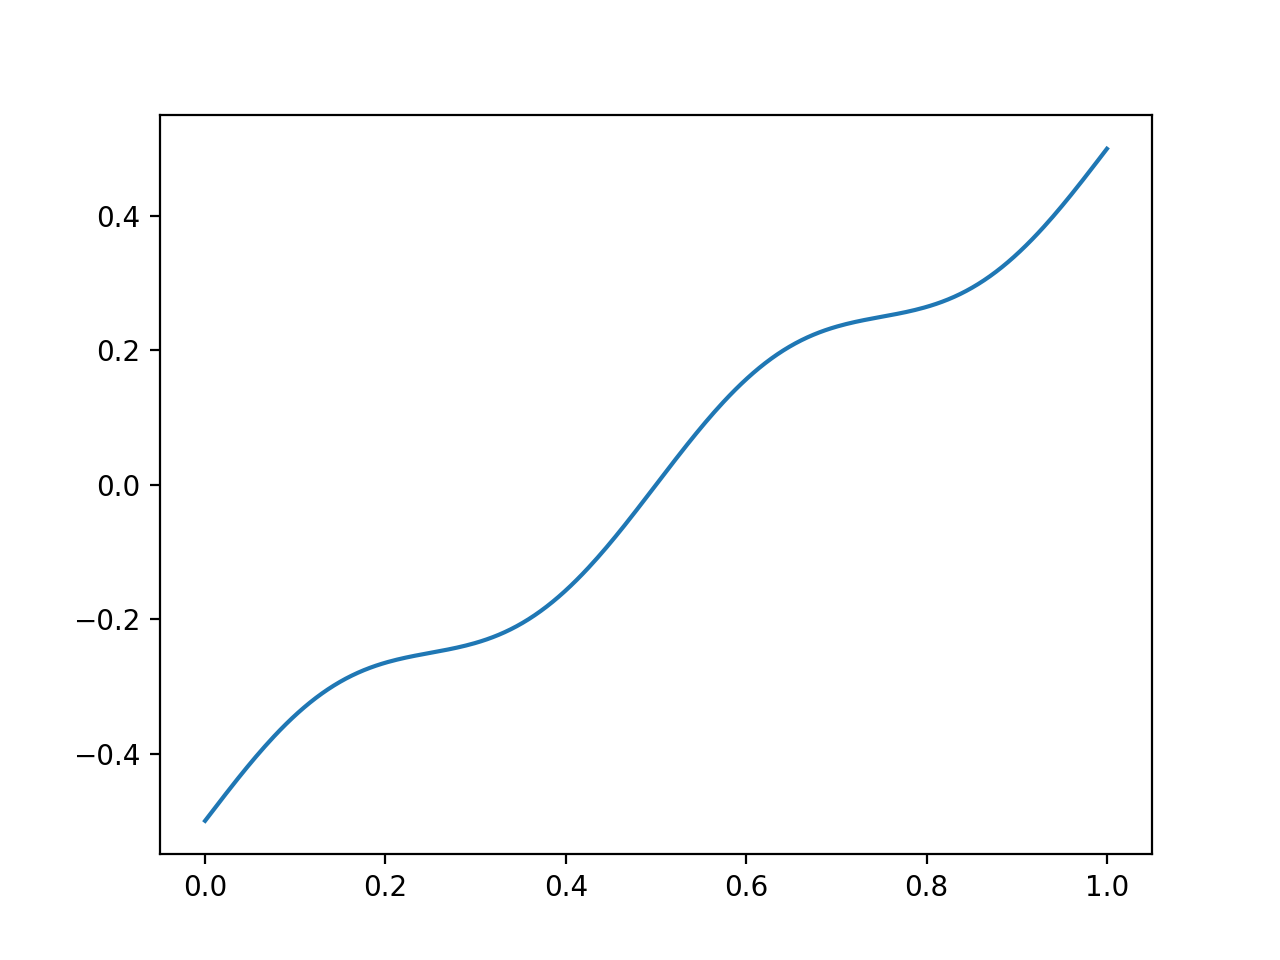

In [26]:
%matplotlib notebook
plt.plot(np.linspace(0, theta, n+2), x0)

In [27]:
x, v, a, f, t = spring_sim(kt, mt, R, theta, n, x0, dt, T)

In [28]:
x[-1]

array([-0.5       , -0.49437804, -0.48876009, -0.48315014, -0.47755219,
       -0.47197021, -0.46640812, -0.46086983, -0.45535921, -0.44988006,
       -0.44443616, -0.43903118, -0.43366877, -0.42835248, -0.42308579,
       -0.41787207, -0.41271464, -0.40761668, -0.40258129, -0.39761146,
       -0.39271006, -0.38787984, -0.38312343, -0.37844333, -0.3738419 ,
       -0.36932137, -0.36488383, -0.36053123, -0.35626536, -0.35208787,
       -0.34800024, -0.3440038 , -0.34009975, -0.33628908, -0.33257265,
       -0.32895114, -0.32542509, -0.32199483, -0.31866057, -0.31542232,
       -0.31227993, -0.3092331 , -0.30628134, -0.303424  , -0.30066028,
       -0.29798921, -0.29540964, -0.29292028, -0.29051969, -0.28820625,
       -0.28597821, -0.28383366, -0.28177055, -0.27978669, -0.27787973,
       -0.27604723, -0.27428657, -0.27259503, -0.27096979, -0.26940787,
       -0.26790621, -0.26646164, -0.26507089, -0.26373059, -0.26243728,
       -0.26118743, -0.25997743, -0.2588036 , -0.25766219, -0.25

<IPython.core.display.Javascript object>


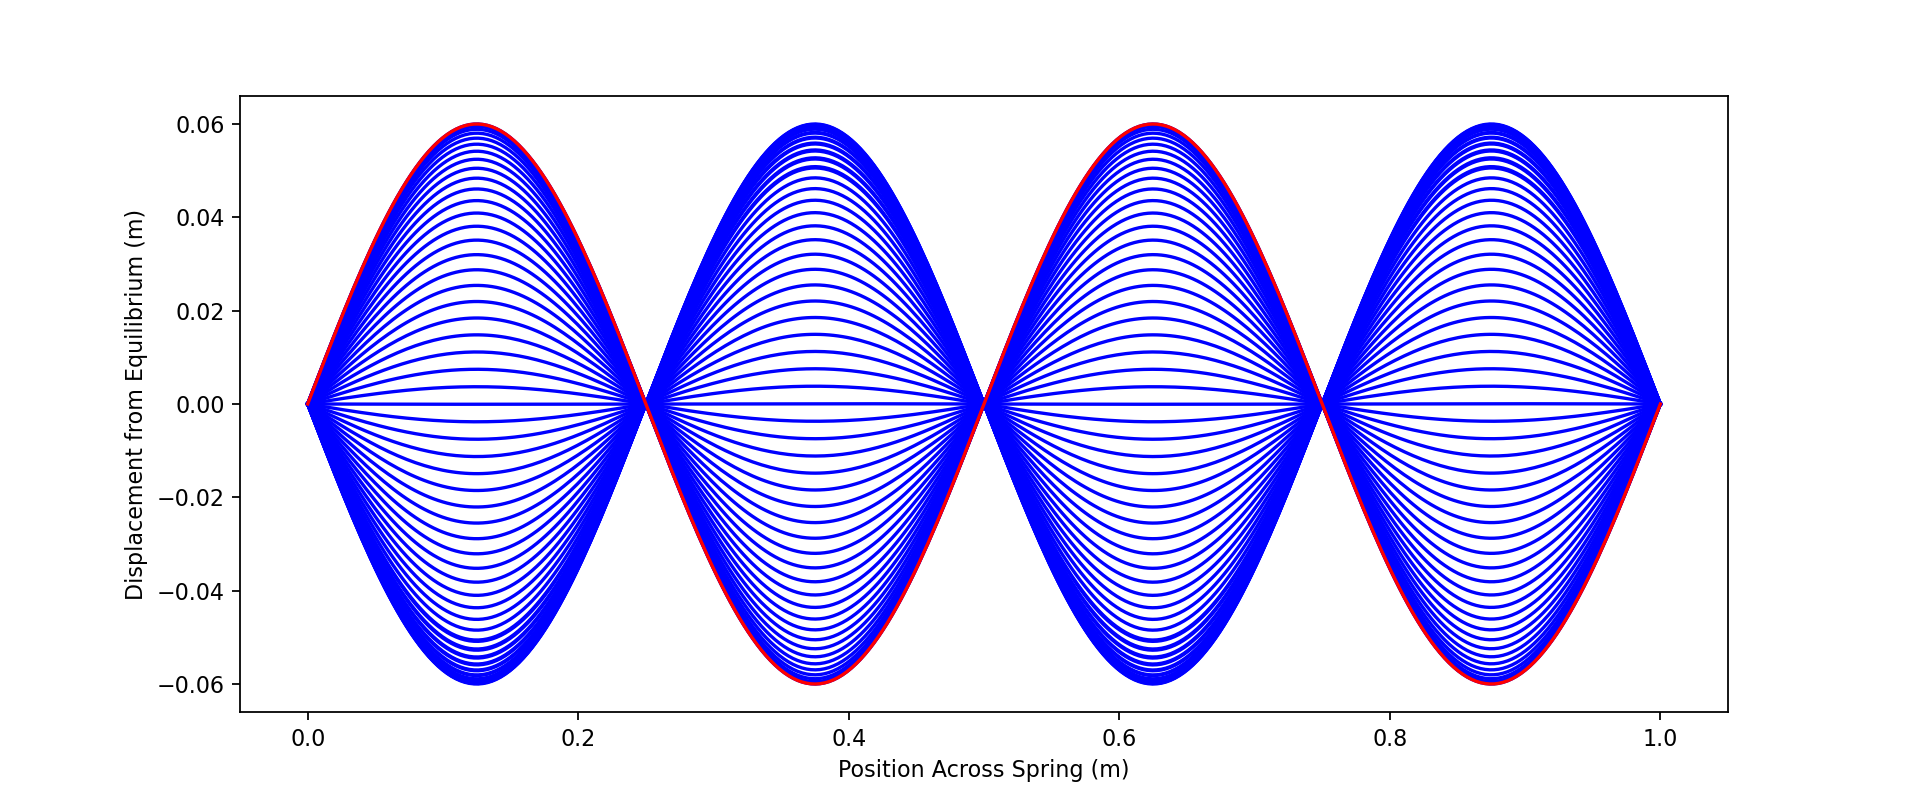

In [29]:
%matplotlib notebook
plt.figure(figsize=(12, 5), dpi=80)
xe = np.linspace(-theta/2, theta/2, n+2)
for i in range(60):
    plt.plot(np.linspace(0, theta, n+2), (x-xe)[5*i], color = 'b')
    
plt.xlabel("t (s)", fontsize = '10')
plt.ylabel("Displacement from Equilibrium (m)", fontsize = '10')
plt.xlabel("Position Across Spring (m)", fontsize = '10')

plt.plot(np.linspace(0, theta, n+2), (x-xe)[0], color = 'r')
plt.show()

In [30]:
#Initialize positions of point masses, travelling wave is expected
xa = 0.02*np.sin(np.linspace(0, np.pi, int(n+2-9/10*n)))
xa = np.concatenate((xa, np.linspace(0, 0, int(9/10*n))))
x0 = np.linspace(-theta/2, theta/2, n+2) + xa

<IPython.core.display.Javascript object>


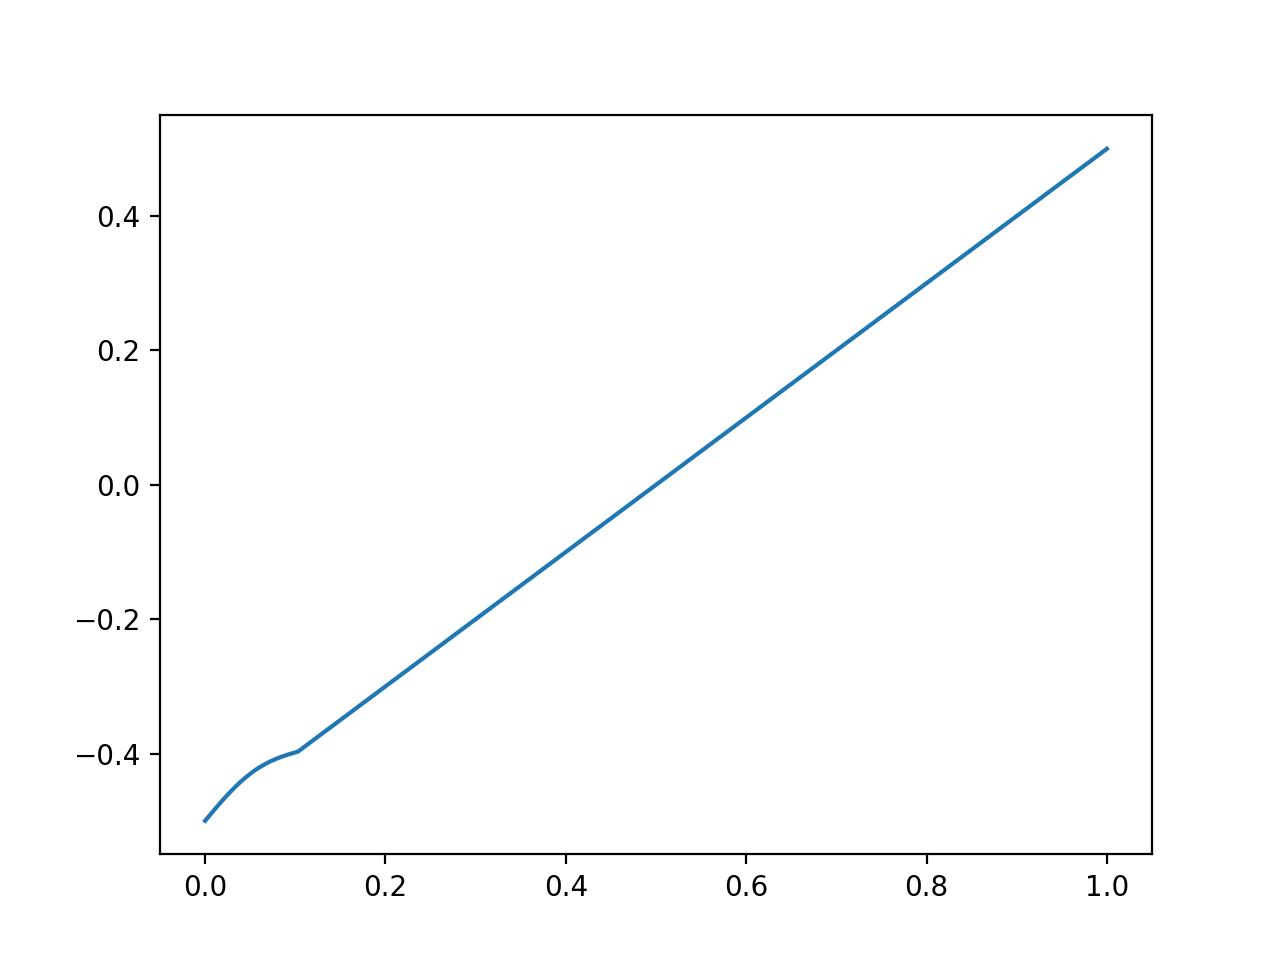

In [31]:
%matplotlib notebook
plt.plot(np.linspace(0, theta, n+2), x0)
plt.show()

In [32]:
x, v, a, f, t = spring_sim(kt, mt, R, theta, n, x0, dt, T)

<IPython.core.display.Javascript object>


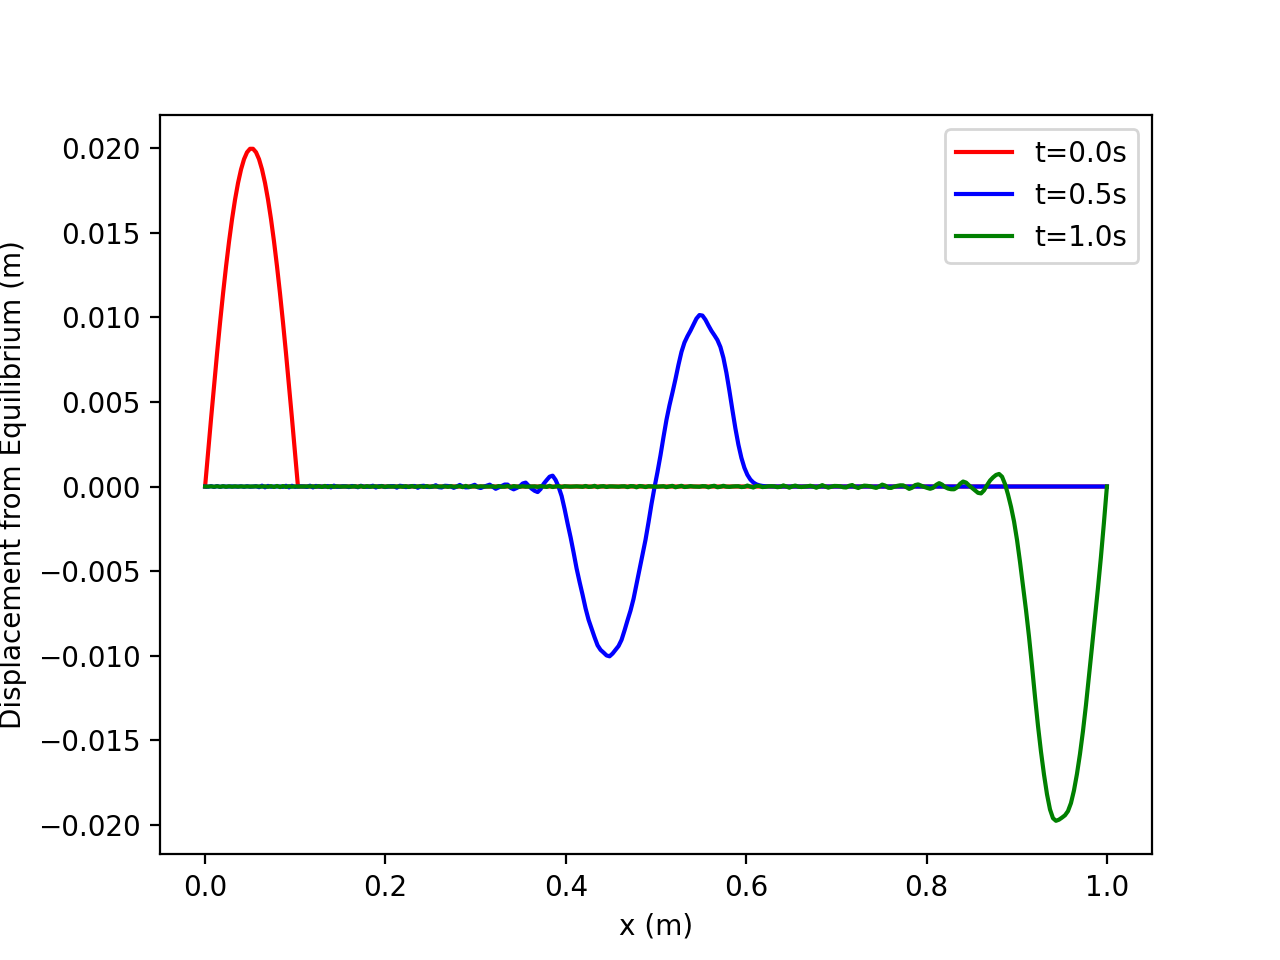

In [33]:
%matplotlib notebook
xe = np.linspace(-theta/2, theta/2, n+2)
plt.plot(np.linspace(0, theta, n+2), (x-xe)[0], color = 'r', label = 't=0.0s')
plt.plot(np.linspace(0, theta, n+2), (x-xe)[500], color = 'b', label = 't=0.5s')
plt.plot(np.linspace(0, theta, n+2), (x-xe)[1000], color = 'g', label = 't=1.0s')

plt.xlabel("x (m)", fontsize = '10')
plt.ylabel("Displacement from Equilibrium (m)", fontsize = '10')

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


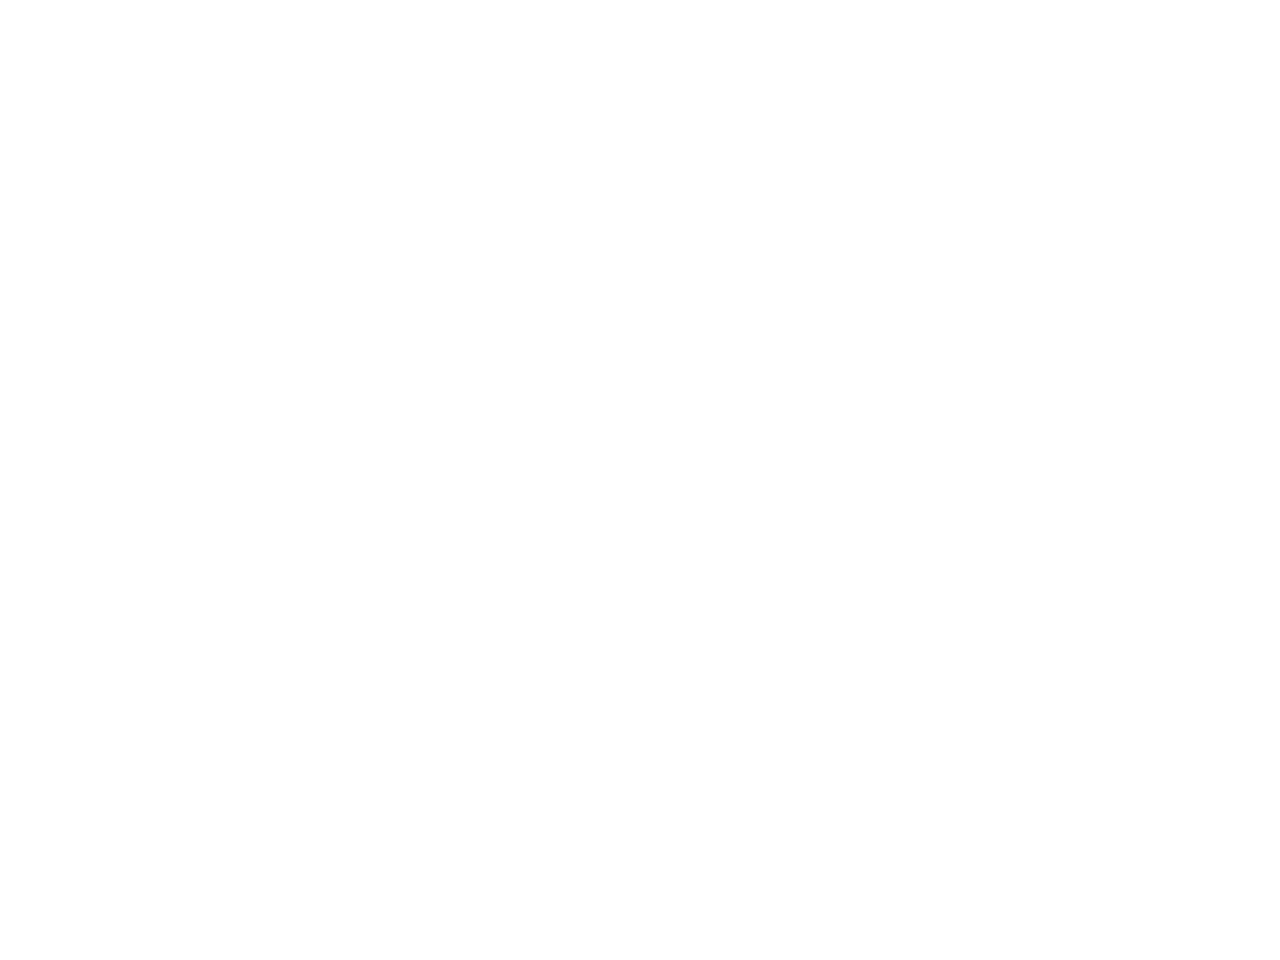

<IPython.core.display.Javascript object>


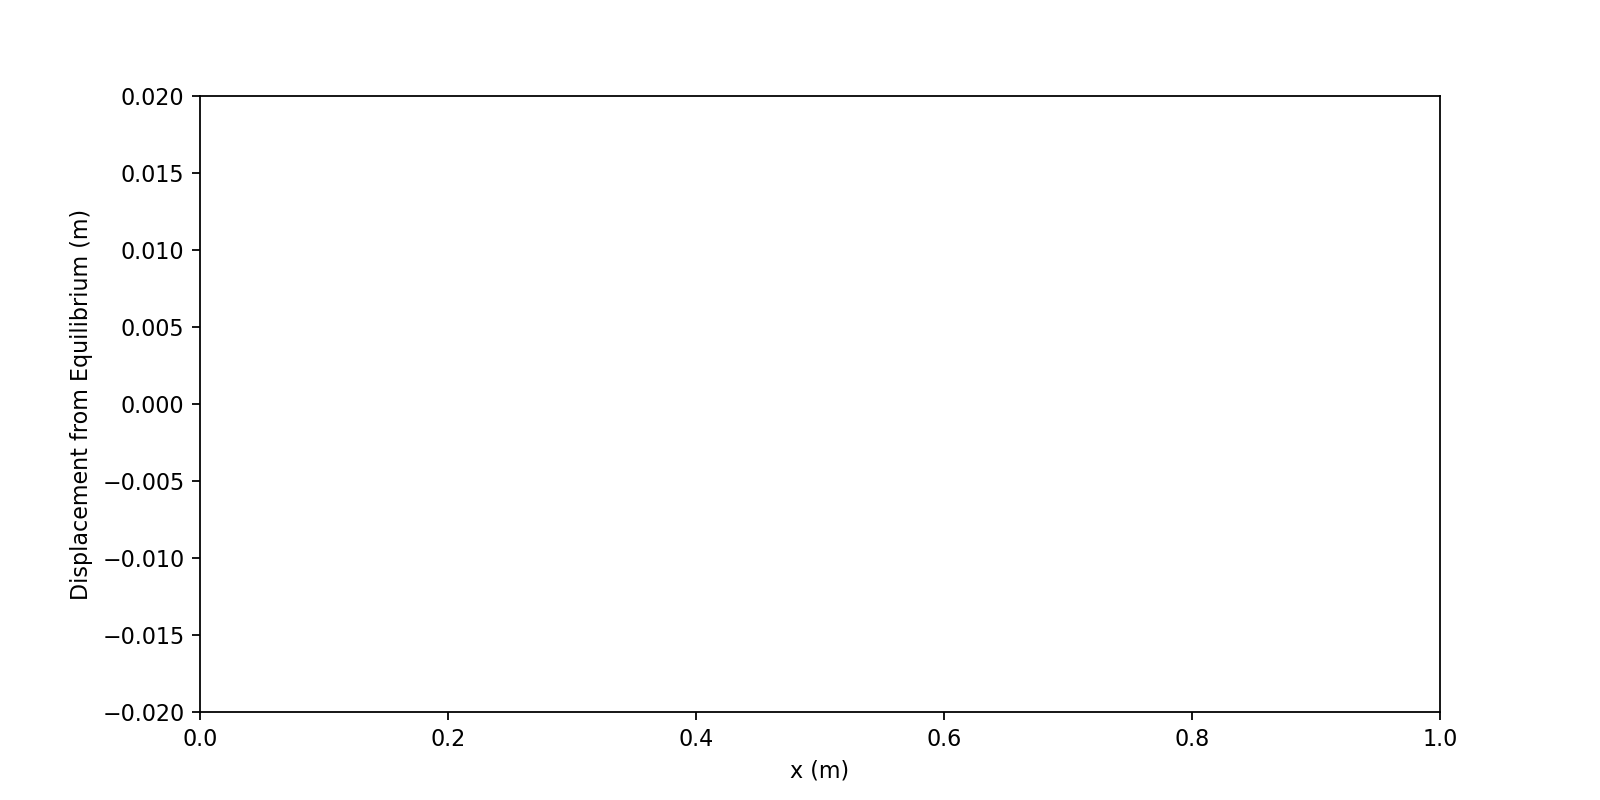

Text(0, 0.5, 'Displacement from Equilibrium (m)')

In [34]:
%matplotlib notebook
fig = plt.figure()
plt.figure(figsize=(10, 5), dpi=80)
ax = plt.axes(xlim=(0, 1), ylim=(-0.02, 0.02))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(np.linspace(0, theta, n+2), (x-xe)[10*i])
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=1, blit=True)
plt.xlabel("x (m)", fontsize = '10')
plt.ylabel("Displacement from Equilibrium (m)", fontsize = '10')


<IPython.core.display.Javascript object>


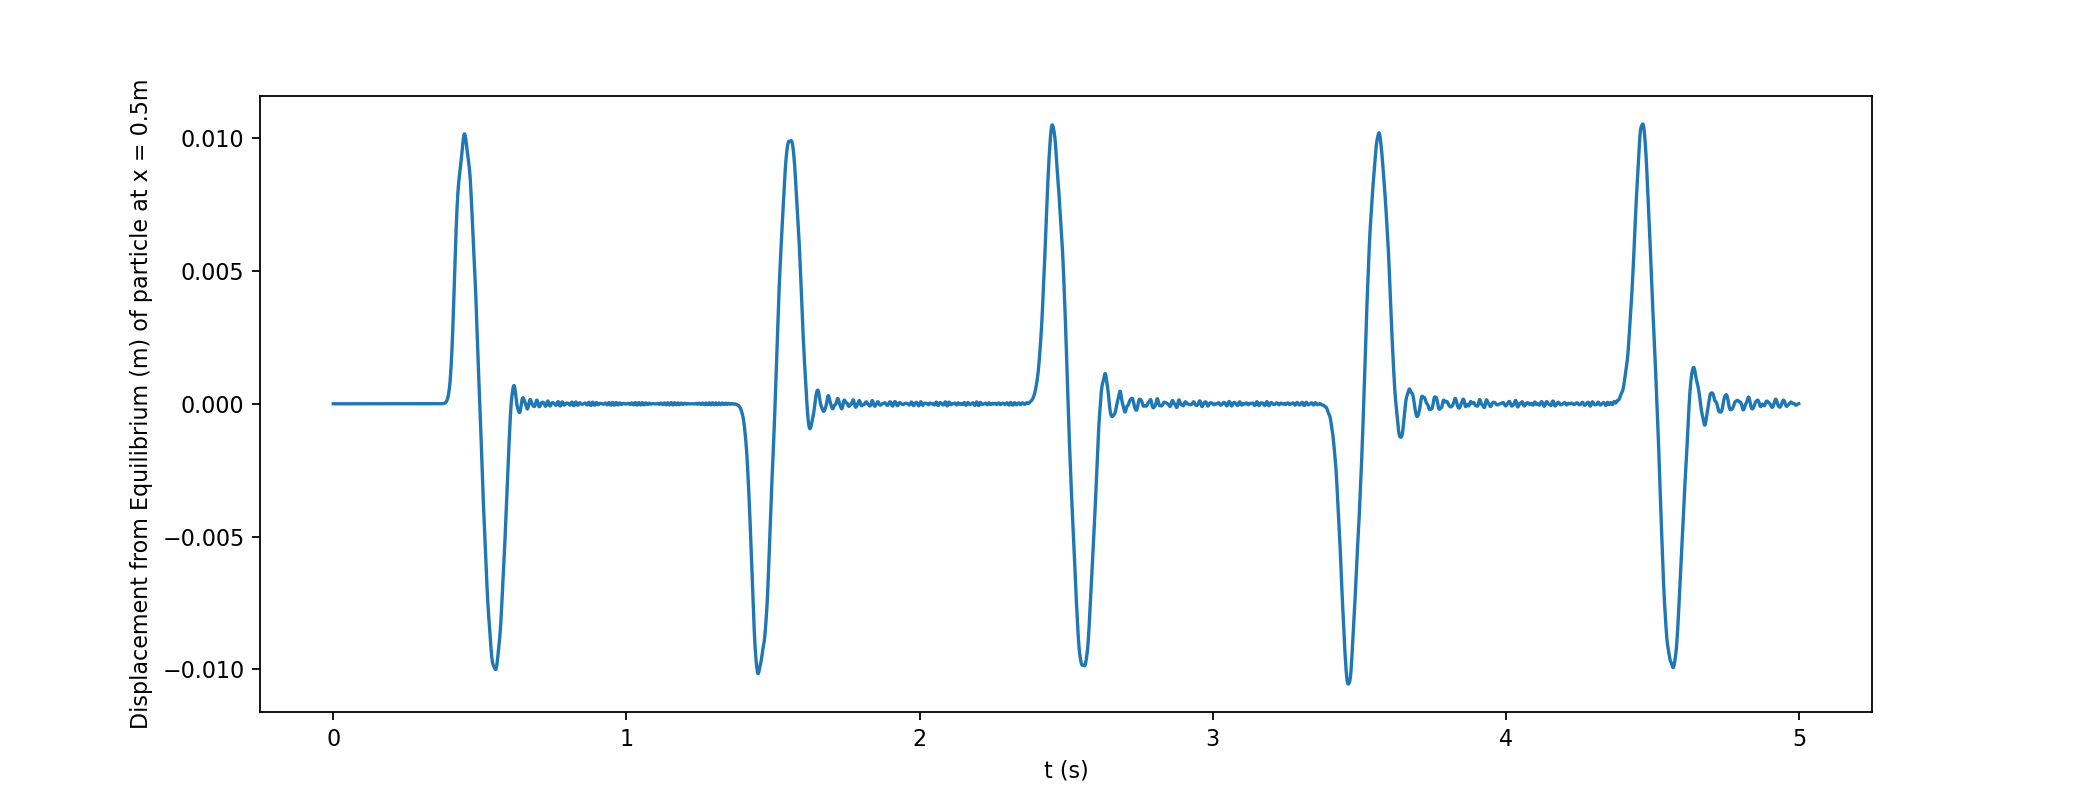

In [43]:
%matplotlib notebook
plt.figure(figsize=(13, 5), dpi=80)
plt.plot(t[:5000], (x-xe)[:,int(n/2)][:5000])
plt.xlabel("t (s)", fontsize = '10')
plt.ylabel("Displacement from Equilibrium (m) of particle at x = 0.5m", fontsize = '10')
plt.show()

In [44]:
kt = 10
g = 1
n = 100
dt = 0.001
u = 1

In [45]:
#Euler's method for spring wrapped around circular arc under gravity and viscous damping
def spring_sim2(kt, mt, R, g, u, theta, n, x0, dt = 0.01, T = 10):
    x = x0
    x = np.reshape(x, (1, n+2))
    
    f = np.linspace(0, 0, n+2)
    for i in range(n+1):
        f[i] = mt/((n+1)*(x[-1, i+1]-x[-1, i]))
    f[-1] = f[-2]
    f = np.reshape(f, (1, n+2))
    
    v = np.linspace(0, 0, n+2)
    v = np.reshape(v, (1, n+2))
    
    a = np.linspace(0, 0, n+2)
    a = np.reshape(a, (1, n+2))

    for i in range(n):
        a[-1, i+1] = n**2 * kt / mt * (x[-1, i+2] + x[-1, i] - 2*x[-1, i+1]) - g/R*np.sin(x[-1, i+1]) - u*v[-1, i+1]
    
    t = [0]
    while t[-1] < T:
        v_add = v[-1] + a[-1]*dt
        v = np.vstack([v, v_add])
    
        x_add = x[-1] + v[-1]*dt
        x = np.vstack([x, x_add])
        
        f_add = np.linspace(0, 0, n+2)
        for i in range(n+1):
            f_add[i] = mt/((n+1)*(x[-1, i+1]-x[-1, i]))
        f_add[-1] = f_add[-2]
        f = np.vstack([f, f_add])
        
        a_add = np.linspace(0, 0, n+2)
        
        for i in range(n):
            a_add[i+1] = n**2 * kt / mt * (x[-1, i+2] + x[-1, i] - 2*x[-1, i+1]) - g/R*np.sin(x[-1, i+1]) - u*v[-1, i+1]
        
        a = np.vstack([a, a_add])
    
        t+= [t[-1]+dt]
    return(x, v, a, f, t)

In [46]:
x0 = np.linspace(-theta/2, theta/2, n+2)


In [47]:
x, v, a, f, t  = spring_sim2(kt, mt, R, g, u, theta, n, x0, dt, T = 20)

In [48]:
x[100]

array([-0.5       , -0.48999735, -0.47999949, -0.47000645, -0.46001817,
       -0.45003475, -0.44005605, -0.43008223, -0.42011315, -0.41014888,
       -0.40018946, -0.39023471, -0.38028492, -0.37033978, -0.36039944,
       -0.35046404, -0.34053316, -0.33060721, -0.32068616, -0.31076955,
       -0.30085781, -0.29095115, -0.2810489 , -0.27115111, -0.26125855,
       -0.25137102, -0.24148764, -0.23160835, -0.2217341 , -0.21186566,
       -0.20200267, -0.19214383, -0.18228763, -0.17243285, -0.16257877,
       -0.15272501, -0.14287141, -0.13301791, -0.12316447, -0.1133111 ,
       -0.10345778, -0.09360451, -0.08375128, -0.0738981 , -0.06404495,
       -0.05419183, -0.04433873, -0.03448566, -0.0246326 , -0.01477956,
       -0.00492652,  0.00492652,  0.01477956,  0.0246326 ,  0.03448566,
        0.04433873,  0.05419183,  0.06404495,  0.0738981 ,  0.08375128,
        0.09360451,  0.10345778,  0.1133111 ,  0.12316447,  0.13301791,
        0.14287141,  0.15272501,  0.16257877,  0.17243285,  0.18

<IPython.core.display.Javascript object>


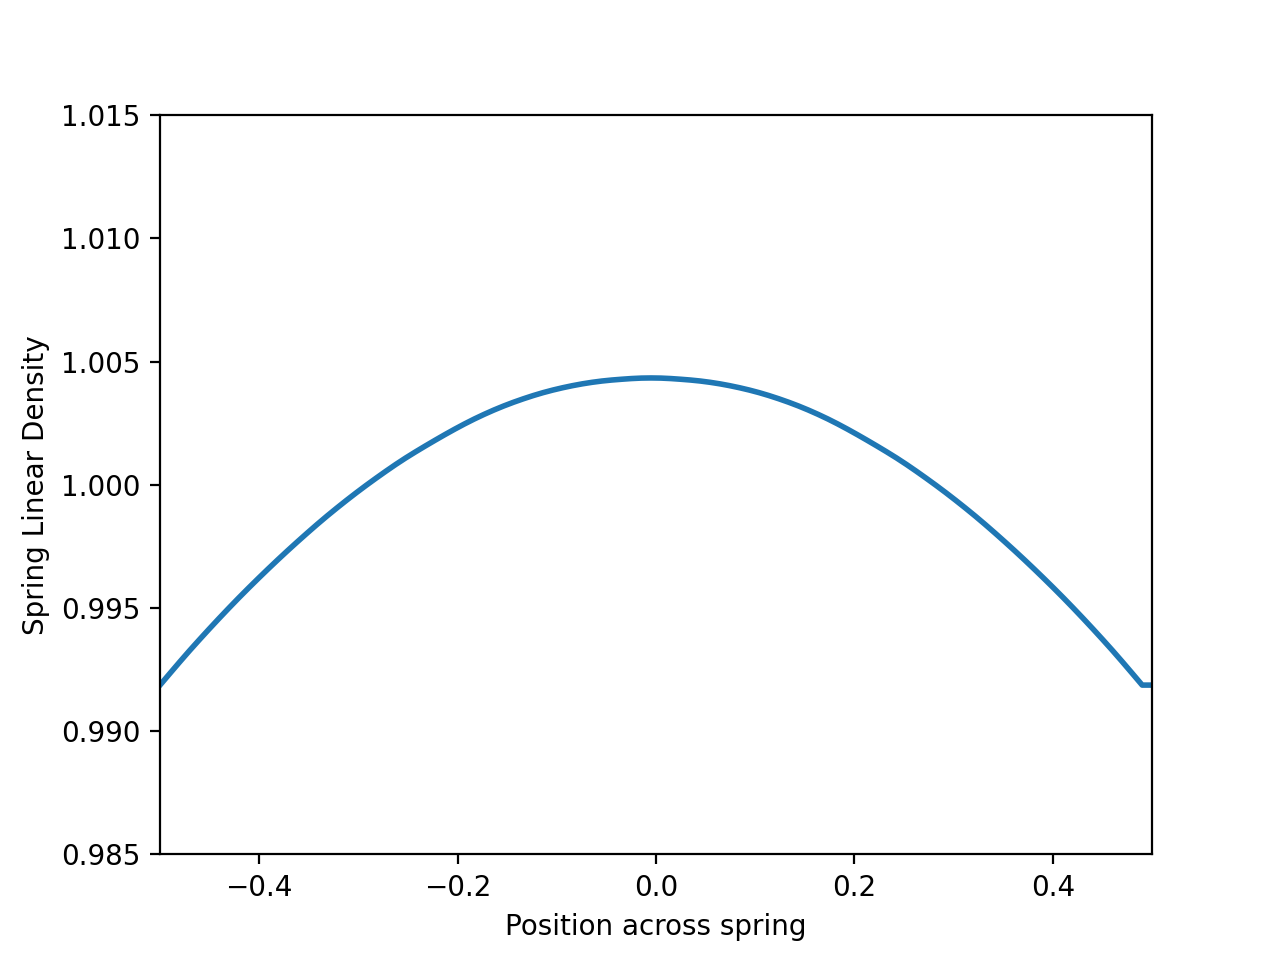

In [49]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(xlim=(-0.5, 0.5), ylim=(0.985, 1.015))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(np.linspace(-theta/2, theta/2, n+2), f[10*i])
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100000, interval=100, blit=True)
plt.ylabel(r"Spring Linear Density")
plt.xlabel(r"Position across spring")
plt.show()

In [50]:
#Euler's method for spring wrapped around circular arc under gravity and viscous damping with external forces at ends of spring
#Algorithm for finding maximum F
def spring_sim4(kt, mt, R, g, u, F0, dF, n, dt = 0.01, T = 10, down = True, Fast = True, Stop = True, dF0 = 0):
    
    start = time.time()
    
    theta0 = F0/kt/R
    
    if down:
        x = np.linspace(-theta0/2, theta0/2, n+2)
    else:
        x = np.linspace(-theta0/2+np.pi, theta0/2+np.pi, n+2)
    
    x = np.reshape(x, (1, n+2))
    
    f = np.linspace(0, 0, n+2)
    for i in range(n+1):
        f[i] = mt/((n+2)*(x[-1, i+1]-x[-1, i]))
    f[-1] = f[-2]
    f = np.reshape(f, (1, n+2))
    
    v = np.linspace(0, 0, n+2)
    v = np.reshape(v, (1, n+2))
    
    a = np.linspace(0, 0, n+2)
    a = np.reshape(a, (1, n+2))
    
    F = 0
    
    
    
    
    y = [np.sum(x[-1])/(n+2)]
    
    if not(down):
        y[0] = y[0] - np.pi

    for i in range(n):
        a[-1, i+1] = (n+1)*(n+2) * kt / mt * (x[-1, i+2] + x[-1, i] - 2*x[-1, i+1]) - g/R*np.sin(x[-1, i+1]) - u*(v[-1, i+1])
    
    a[-1, 0] = (n+1)*(n+2) * kt / mt * (x[-1, 1] - x[-1, 0]) - (n+2) / mt * F0
    a[-1, n+1] = (n+2) / mt * F0 - (n+1)*(n+2) * kt / mt * (x[-1, n+1] - x[-1, n])
    
    t = [0]
    
    count1 = 0
    
 
    
    while t[-1] < T or Stop:
        v_add = v[-1] + a[-1]*dt
        v = np.vstack([v, v_add])
    
        x_add = x[-1] + v[-1]*dt
        x = np.vstack([x, x_add])
        
        f_add = np.linspace(0, 0, n+2)
        for i in range(n+1):
            f_add[i] = mt/((n+1)*(x[-1, i+1]-x[-1, i]))
        f_add[-1] = f_add[-2]
        f = np.vstack([f, f_add])
        
        a_add = np.linspace(0, 0, n+2)
        
        for i in range(n):
            a_add[i+1] = (n+1)*(n+2) * kt / mt * (x[-1, i+2] + x[-1, i] - 2*x[-1, i+1]) - g/R*np.sin(x[-1, i+1]) - u*(v[-1, i+1])
        
        a = np.vstack([a, a_add])
        
        a[-1, 0] = (n+1)*(n+2) * kt / mt * (x[-1, 1] - x[-1, 0]) - (n+2) / mt * (F0 - F/2) - g/R*np.sin(x[-1, 0]) - u*(v[-1, 0])
        a[-1, n+1] = (n+2) / mt * (F0+F/2) - (n+1)*(n+2) * kt / mt * (x[-1, n+1] - x[-1, n]) - g/R*np.sin(x[-1, -1]) - u*(v[-1, -1])
    
        t += [t[-1]+dt]
        
            
        
        if np.all(v[-1] < 0.001) and np.all(a[-1] < 0.05):
            #count1 = int(np.round(1/dt))
            F += dF
            print("t = " + str(np.round(t[-1], 2))+", " + "F = " + str(F), end = "\r")
        
        #if count1 > 0:
            #count1 -= 1
            #F += dF*dt
    
        if Fast:
            a = a[1:2]
            v = v[1:2]
            x = x[1:2]
            f = f[1:2]
        

        y.append(np.sum(x[-1])/(n+2))
        
        
        
        if not(down):
            y[-1] = y[-1] - np.pi
        
        
        
        if Stop and y[-1] > np.pi:
            break
        
    
    end = time.time()
    print("                                                                       ", end = "\r")
    time.sleep(0.1)
    print(end - start)
    
    return(x, v, a, f, y, t, F)

In [58]:
kt = 10
mt = 1
g = 1
u = 0.1
R = 1

F0 = 5
n = 50

dF = 0.005
dt = 0.005

down = True

x, v, a, f, y, t, F = spring_sim4(kt, mt, R, g, u, F0, dF, n, dt, T = 100, down = down, Stop = True, Fast = True)

35.86132597923279                                                      


In [59]:
F

0.9900000000000008

<IPython.core.display.Javascript object>


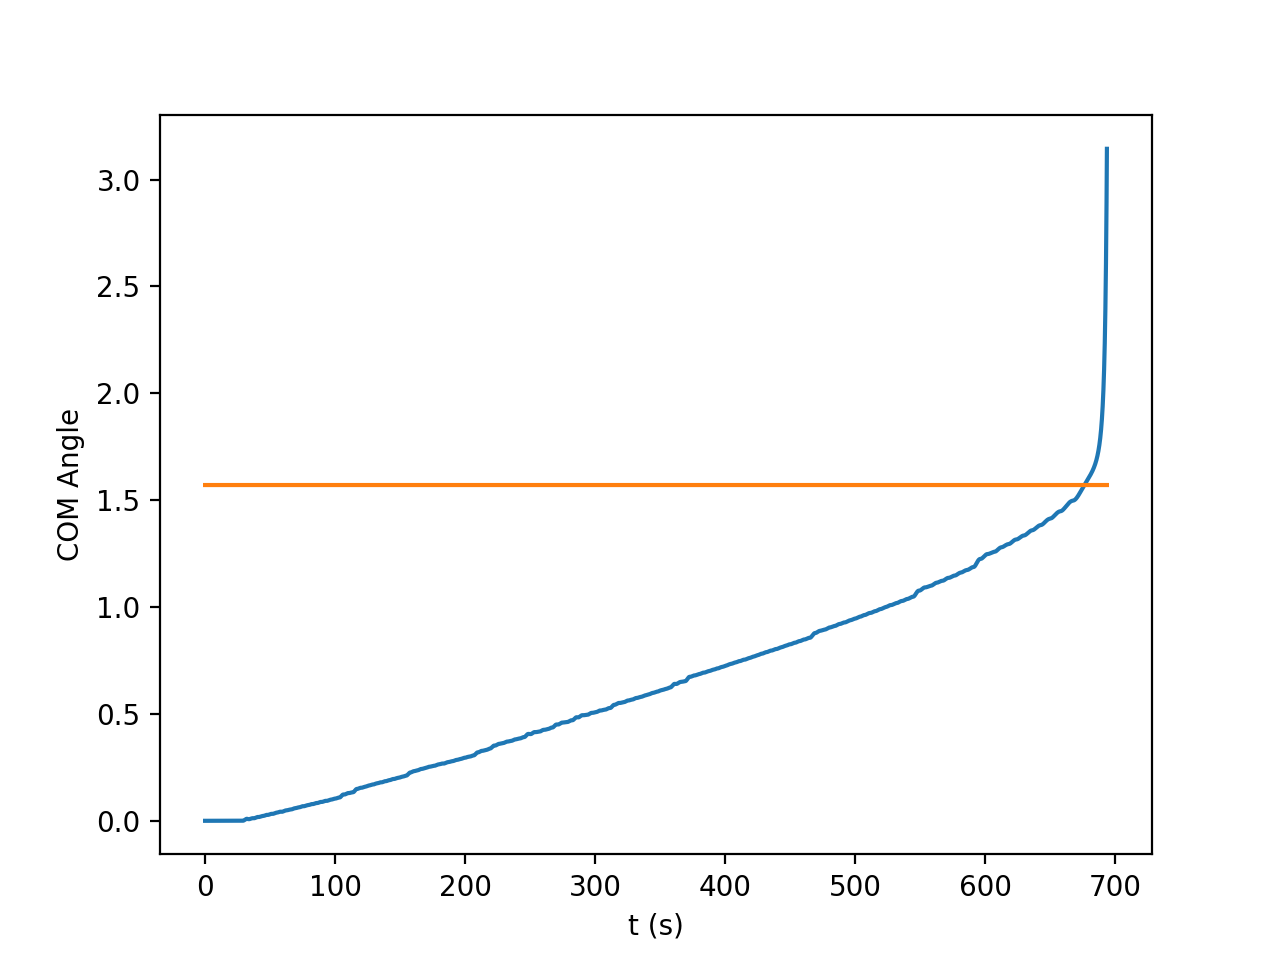

Text(0, 0.5, 'COM Angle')

In [60]:
#After the angle of com of spring exceeds pi/2, spring begins rotating indefinitely
%matplotlib notebook
plt.plot(t, y)
plt.plot(t, np.linspace(np.pi/2, np.pi/2, len(t)))
plt.xlabel("t (s)", fontsize = '10')
plt.ylabel("COM Angle", fontsize = '10')

In [311]:
kt = 10
mt = 1
g = 1
u = 0.1
n = 50
T = 20
dF = 0.005
dt = 0.005



N = 100
X = np.linspace(0.1, 30, N)


Y_db = np.linspace(0, 0, N)

for i in range(N):
    x, v, a, f, y, t, F_add = spring_sim4(kt, mt, R, g, u, X[i]*kt*R, dF, n, dt, T = 15, down = True, Stop = True, Fast = True)
    Y_db[i] = F_add / mt / g
    print(str(i+1) + "/" + str(N))
    
Y_ub = np.linspace(0, 0, N)

for i in range(N):
    x, v, a, f, y, t, F_add = spring_sim4(kt, mt, R, g, u, X[i]*kt*R, dF, n, dt, T = 15, down = False, Stop = True, Fast = True)
    Y_ub[i] = F_add / mt / g
    print(str(i+1) + "/" + str(N))



35.644757986068726                                                     
1/100
36.42097210884094                                                      
2/100
37.46075177192688                                                      
3/100
37.30030298233032                                                      
4/100
38.21034908294678                                                      
5/100
37.57435703277588                                                      
6/100
35.374855041503906                                                     
7/100
35.271169900894165                                                     
8/100
35.05682301521301                                                      
9/100
35.31485629081726                                                      
10/100
32.64678478240967                                                      
11/100
30.901290893554688                                                     
12/100
29.526026010513306                                           

1.896388292312622                                                      
5/100
1.9546089172363281                                                     
6/100
1.9967691898345947                                                     
7/100
11.877994060516357                                                     
8/100
2.2618229389190674                                                     
9/100
10.713586807250977                                                     
10/100
2.2273080348968506                                                     
11/100
12.543184041976929                                                     
12/100
11.136842012405396                                                     
13/100
2.765957832336426                                                      
14/100
3.0832459926605225                                                     
15/100
3.2945210933685303                                                     
16/100
3.768496036529541                                        

<IPython.core.display.Javascript object>


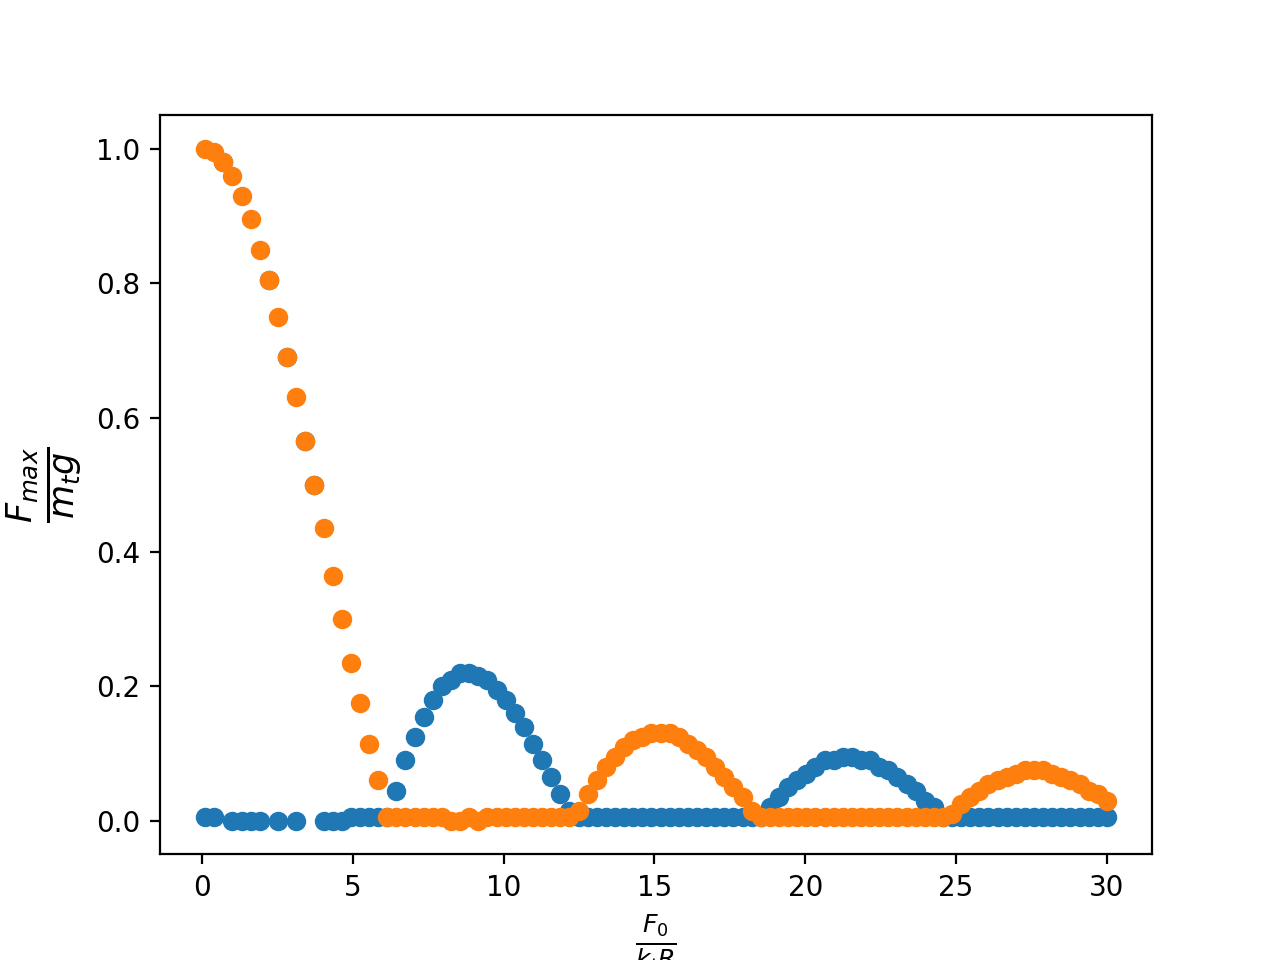

In [321]:
%matplotlib notebook

plt.plot(X, Y_ub, "o")
plt.plot(X, Y_db, "o")

#plt.plot(np.linspace(0.001, 30, 1000), np.abs(np.sin(np.linspace(0.001, 30, 1000)/2) / (np.linspace(0.001, 30, 1000)/2)))

plt.ylabel(r"$\frac{F_{max}}{m_t g}$", fontsize=18)
plt.xlabel(r"$\frac{F_0}{k_t R}$", fontsize=13)
plt.show()

<IPython.core.display.Javascript object>


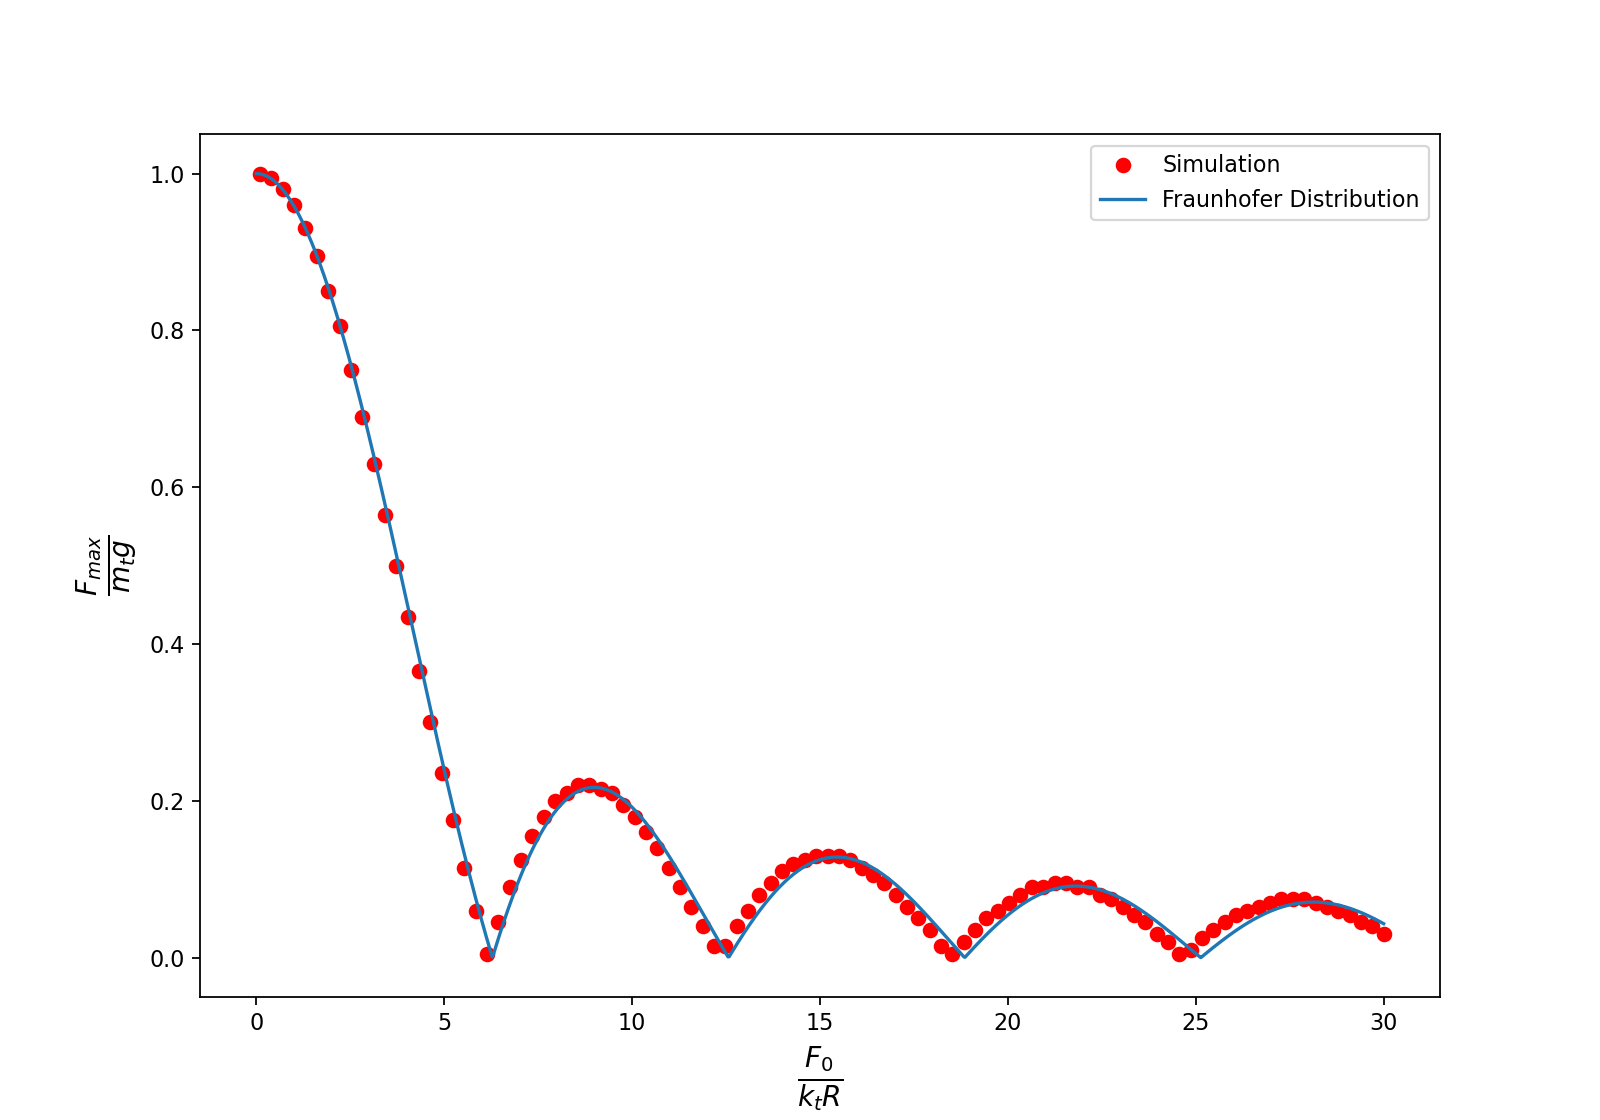

In [373]:
Y_pb = []
Y_nb = []

for i in range(N):
    if Y_db[i] > Y_ub[i]:
        Y_pb.append(Y_db[i])
        Y_nb.append(Y_ub[i])
    else:
        Y_pb.append(Y_ub[i])
        Y_nb.append(Y_db[i])

%matplotlib notebook

plt.figure(figsize=(10, 7), dpi=80)

plt.plot(X, Y_pb, "o", color = "r", label = "Simulation")
#plt.plot(X, Y_nb, "o", color = "c", markersize=2)

plt.plot(np.linspace(0.001, 30, 1000), np.abs(np.sin(np.linspace(0.001, 30, 1000)/2) / (np.linspace(0.001, 30, 1000)/2)), label = "Fraunhofer Distribution")

plt.ylabel(r"$\frac{F_{max}}{m_t g}$", fontsize=18)
plt.xlabel(r"$\frac{F_0}{k_t R}$", fontsize=18)
plt.legend()
plt.show()

In [46]:
#May take several hours to run
kt_l = [0.02, 0.03, 0.05, 0.1]

mt = 1
g = 1
R = 1
u = 0.1
n = 50
T = 20
dF = 0.005
dt = 0.0025



N = 100
X = np.linspace(0.1, 30, N)

Y_d = np.zeros([len(kt_l),N])

Y_u = np.zeros([len(kt_l),N])

for j in range(len(kt_l)):
    
    for i in range(N):
        x, v, a, f, y, t, F_add = spring_sim4(kt_l[j], mt, R, g, u, X[i]*kt_l[j]*R, dF, n, dt, T = 15, down = True, Stop = True, Fast = True)
        Y_d[j][i] = F_add / mt / g
        print(str(i+1) + "/" + str(N))


    for i in range(N):
        x, v, a, f, y, t, F_add = spring_sim4(kt_l[j], mt, R, g, u, X[i]*kt_l[j]*R, dF, n, dt, T = 15, down = False, Stop = True, Fast = True)
        Y_u[j, i] = F_add / mt / g
        print(str(i+1) + "/" + str(N))
    print("---------------------------")
    print(str(j+1) + "/" + str(len(kt_l)))
    print("---------------------------")
    

125.78031992912292                                                     
1/100
141.26994490623474                                                     
2/100
154.7063798904419                                                      
3/100
121.74974989891052                                                     
4/100
163.63619804382324                                                     
5/100
153.29599380493164                                                     
6/100
147.81656503677368                                                     
7/100
146.69895672798157                                                     
8/100
138.67599487304688                                                     
9/100
140.80693316459656                                                     
10/100
1680.7720201015472                                                     
11/100
144.795716047287                                                       
12/100
146.1681888103485                                            

11.584473848342896                                                     
5/100
11.256082773208618                                                     
6/100
19.442588090896606                                                     
7/100
23.086767196655273                                                     
8/100
35.078917264938354                                                     
9/100
30.511194229125977                                                     
10/100
35.471423864364624                                                     
11/100
38.70418977737427                                                      
12/100
42.02663707733154                                                      
13/100
44.921507835388184                                                     
14/100
57.317898988723755                                                     
15/100
51.243638038635254                                                     
16/100
54.574307918548584                                       

27.95064401626587                                                      
12/100
28.366426944732666                                                     
13/100
32.185603857040405                                                     
14/100
34.907674074172974                                                     
15/100
39.791104793548584                                                     
16/100
43.01516795158386                                                      
17/100
48.54352807998657                                                      
18/100
50.51093506813049                                                      
19/100
54.19261693954468                                                      
20/100
58.51804304122925                                                      
21/100
63.25580883026123                                                      
22/100
62.51921892166138                                                      
23/100
65.09077000617981                                   

36.48135304450989                                                      
19/100
41.200170040130615                                                     
20/100
45.06192898750305                                                      
21/100
47.89634990692139                                                      
22/100
52.13685870170593                                                      
23/100
56.84374713897705                                                      
24/100
60.41268610954285                                                      
25/100
64.38171792030334                                                      
26/100
67.25679516792297                                                      
27/100
68.35679292678833                                                      
28/100
68.71544122695923                                                      
29/100
66.32551097869873                                                      
30/100
65.5646071434021                                    

51.32184886932373                                                      
26/100
53.50623416900635                                                      
27/100
56.471200942993164                                                     
28/100
57.079145193099976                                                     
29/100
56.10713982582092                                                      
30/100
56.440852880477905                                                     
31/100
52.89915084838867                                                      
32/100
51.997966051101685                                                     
33/100
49.31413197517395                                                      
34/100
46.313719749450684                                                     
35/100
44.9804790019989                                                       
36/100
39.697197914123535                                                     
37/100
36.55969500541687                                   

<IPython.core.display.Javascript object>


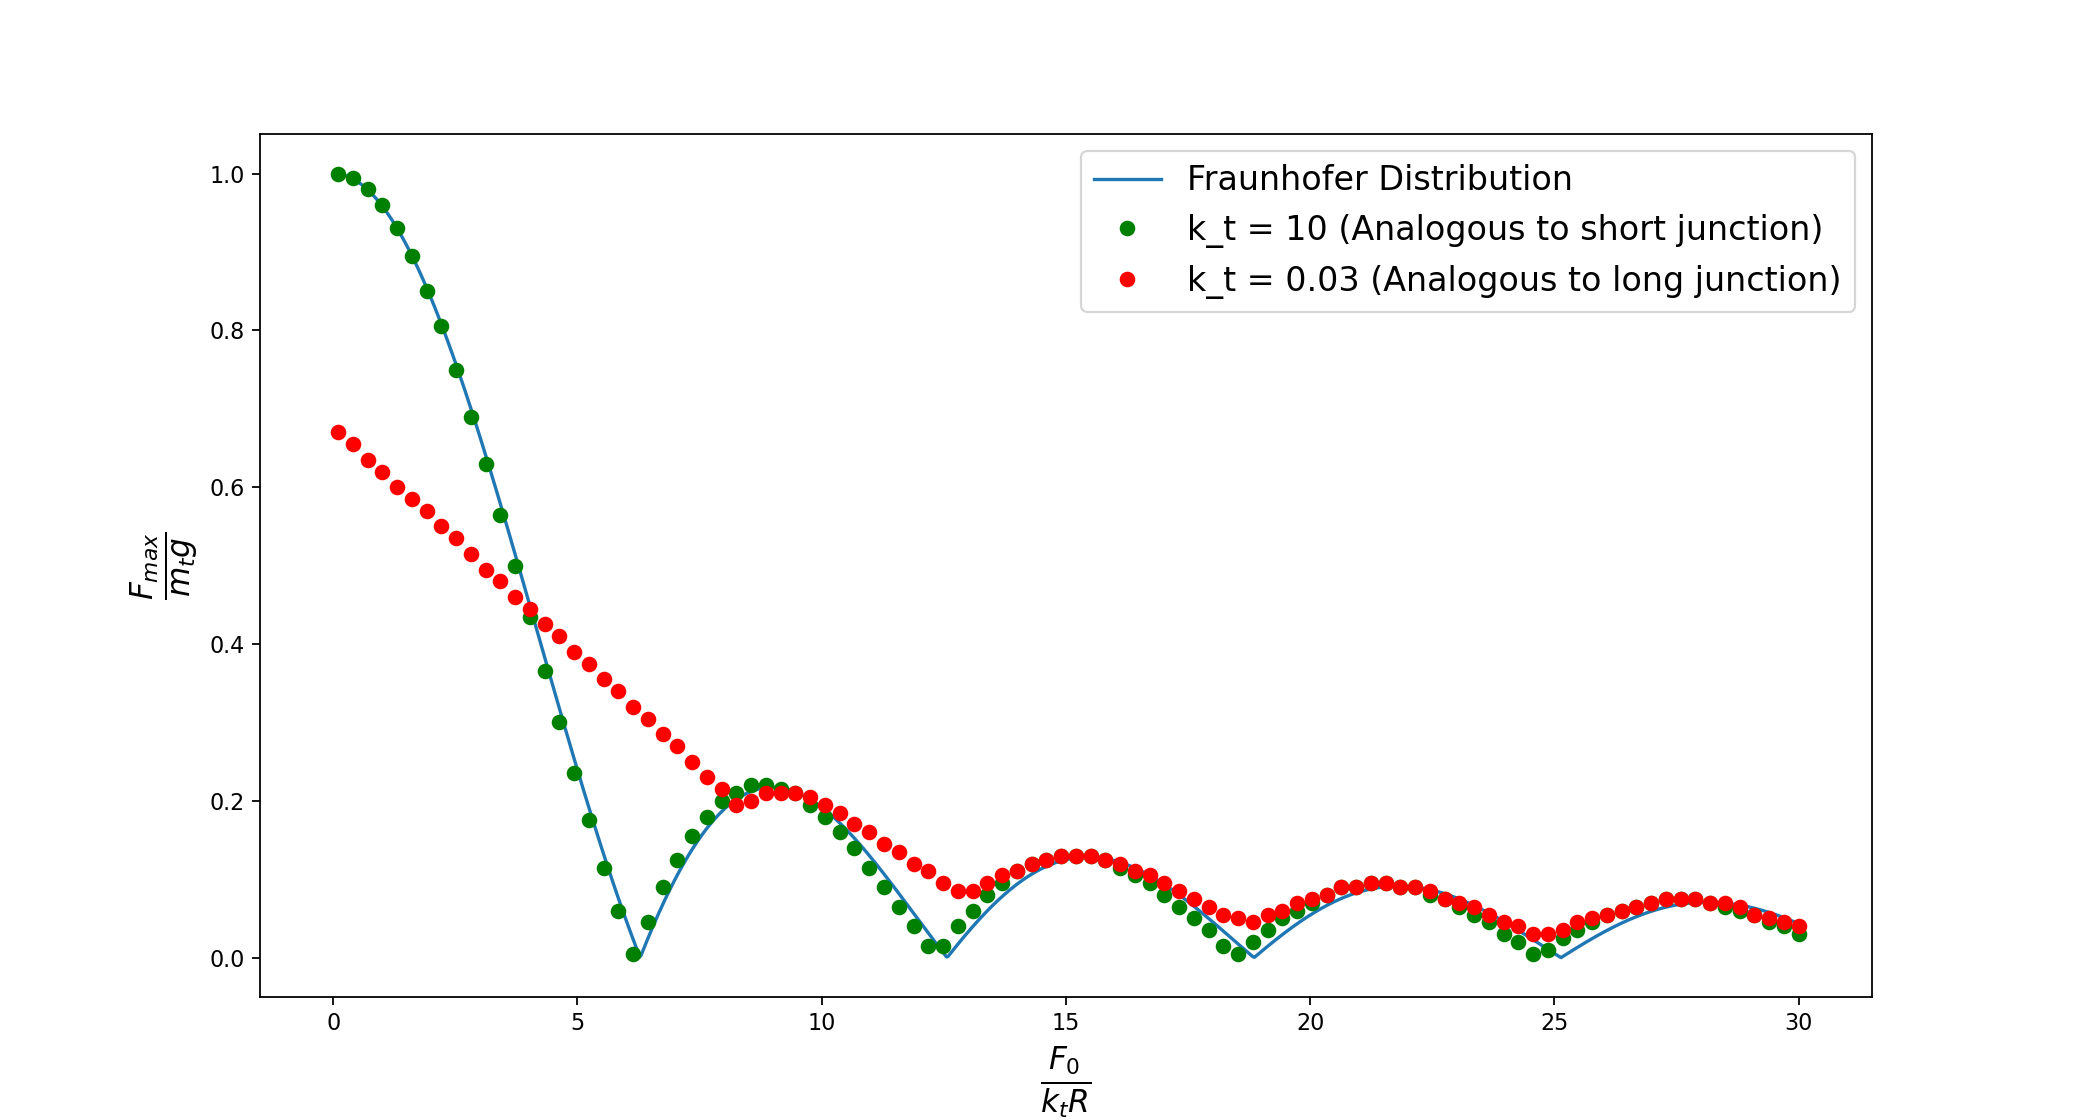

In [535]:
%matplotlib notebook

plt.figure(figsize=(13, 7), dpi=80)

ind = 1

#plt.plot(X, Y_u[ind], "o")
#plt.plot(X, Y_d[ind], "o")

Y_p = []
Y_n = []


for i in range(N):
    if Y_d[ind][i] > Y_u[ind][i]:
        Y_p.append(Y_d[ind][i])
        Y_n.append(Y_u[ind][i])
    else:
        Y_p.append(Y_u[ind][i])
        Y_n.append(Y_d[ind][i])

plt.plot(np.linspace(0.001, 30, 1000), np.abs(np.sin(np.linspace(0.001, 30, 1000)/2) / (np.linspace(0.001, 30, 1000)/2)), label = "Fraunhofer Distribution")

plt.plot(X, Y_pb, "o", color = "g", label = r"k_t = 10 (Analogous to short junction)")
plt.plot(X, np.array(Y_p), "o", color = "r", label = r"k_t = 0.03 (Analogous to long junction)")
#plt.plot(X, np.array(Y_n), "o", color = "c", markersize=2)

plt.ylabel(r"$\frac{F_{max}}{m_t g}$", fontsize=20)
plt.xlabel(r"$\frac{F_0}{k_t R}$", fontsize=20)
plt.legend(prop={'size': 15})
plt.show()